<a href="https://colab.research.google.com/github/urvog/fruits-ml/blob/main/Frutas_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 3. EJEMPLO BASICO DE MACHINE LEARNING

<img src="https://www.neuraldojo.org/media/fruits.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="600"/>
     
En este cuadernos vamos trabajar con un dataset simple de frutas para construir un  clasificador básico de frutas con machine learning y utilizando la librería **Scikit-Learn.**

Para llevar a cabo este trabajo vamos a seguir los pasos básicos de una Pipeline de Machine Learning.

1. Importar el dataset
2. Preparamos los datos
3. Preparamos el modelo
4. Optimizamos el modelo
5. Testing

## 1. Importación de las librerías y datos

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

## 2. Preparación de los datos

### 2.1 Inspeccionamos los datos

In [ ]:
fruits.shape

(59, 7)

In [ ]:
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


### 2.2 Manipulación de los datos

In [ ]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [ ]:
#eliminamos las columnas no utiles para las siguientes etapas.
fruits = fruits.drop(['fruit_name','fruit_subtype'], axis = 1)

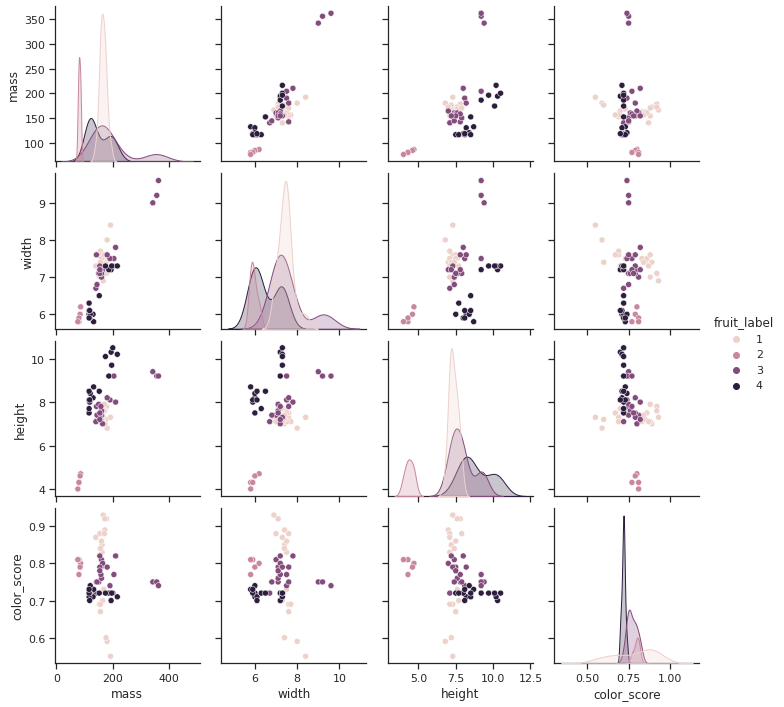

In [ ]:
sns.pairplot(data=fruits, hue='fruit_label')

### 2.3 Verificamos si existen datos faltantes

In [ ]:
fruits.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

## 3. Preparamos el modelo

## 4. Optimizamos el modelo

## 5. Testeamos el modelo